In [ ]:
 !pip install giotto-tda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gtda.images  
import gtda.homology
import gtda.diagrams
import cv2 as cv

In [ ]:
# TensorFlow and tf.keras for installing fashion mnist
import tensorflow as tf
from tensorflow import keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train, digit_train), (test, digit_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
images = np.concatenate((train,test), axis = 0)
data_dim = np.shape(images)[0]
image_dim = 28

In [ ]:
#%%plots image_dim*image_dim np array
def plot_image(Q):
    plt.matshow(Q);
    plt.colorbar()

Printing first 5 images


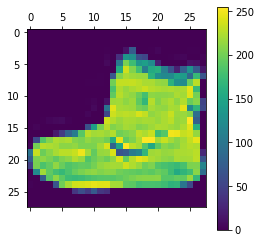

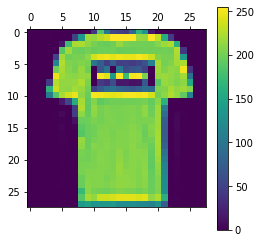

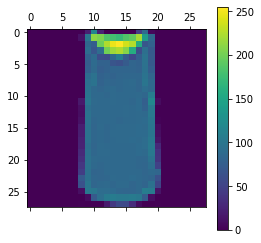

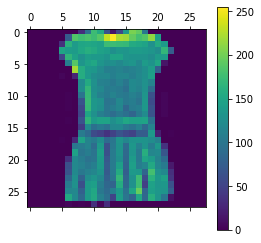

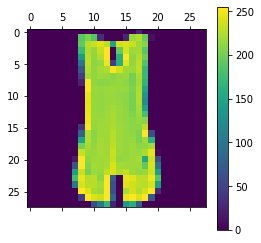

In [ ]:
print('Printing first 5 images')
for i in range(0,5):
  plot_image(images[i])

In [ ]:
transformer = gtda.images.Binarizer(threshold = 0.4).fit(images)
binarized_images= transformer.transform(images)*1

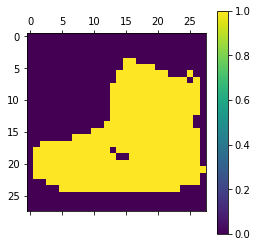

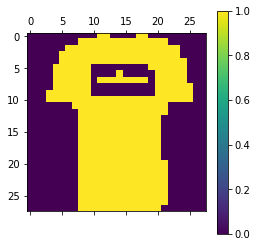

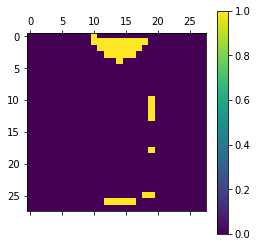

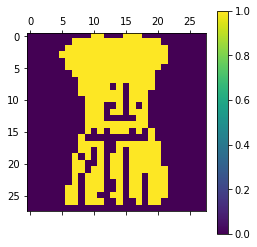

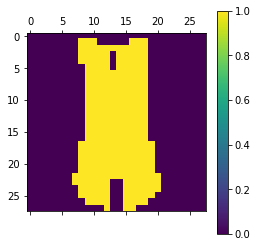

In [ ]:
for i in range(0,5):
  plot_image(binarized_images[i])


In [ ]:
#histogram equalisation
hist_images = np.zeros((data_dim, image_dim, image_dim))
for i in range(0,data_dim):
  hist_images[i] = cv.equalizeHist(images[i])


Printing first 5 equalized images


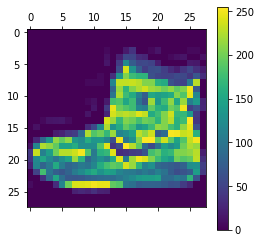

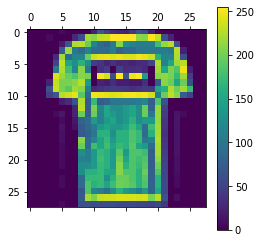

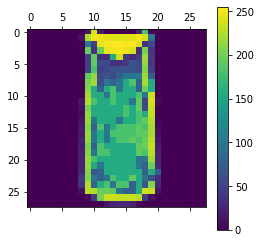

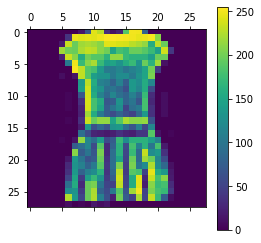

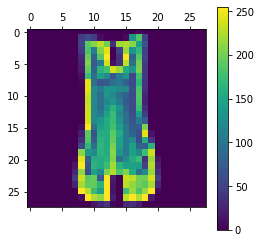

In [ ]:
print('Printing first 5 equalized images')
for i in range(0,5):
  plot_image(hist_images[i])

In [ ]:
#hist_transform = np.zeros((data_dim, image_dim*image_dim))
#for i in range(0,data_dim):
#  hist_transform[i] = np.ravel(hist_images[i,:,:])
#pd.DataFrame(hist_transform).to_csv('hist.csv')
#! zip test3.zip hist.csv
#!mv test3.zip "/content/drive/My Drive"
#!pwd


In [ ]:
transformer = gtda.images.Binarizer(threshold = 0.25).fit(hist_images)
binarized_images_hist = transformer.transform(hist_images)*1

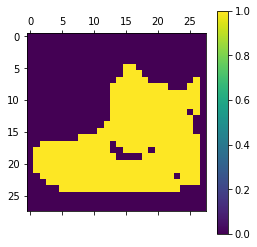

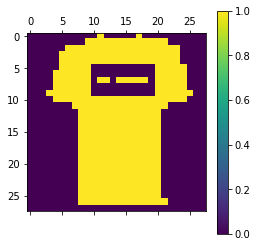

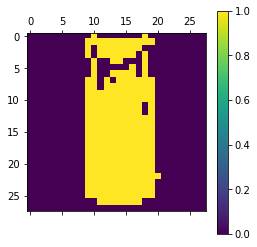

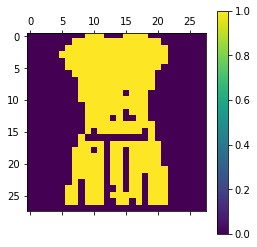

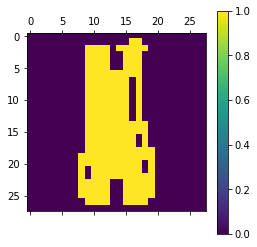

In [ ]:
for i in range(0,5):
  plot_image(binarized_images_hist[i])


In [ ]:
height_array = [[1,0],[0,1],[1,1],[-1,1],[1,-1],[-1,-1],[-1,0],[0,-1]]

def height_data_fn(images = binarized_images, ht_array = height_array, ent=True, land=False, 
                   heat=False, wdist=False, betti=False):
    height_data = np.zeros((np.shape(images)[0],1))
    for i in range(0, np.shape(ht_array)[0]):
        height_fil_images = gtda.images.HeightFiltration(direction = np.array(ht_array[i])).fit_transform(images)
        cubical_diagrams = gtda.homology.CubicalPersistence().fit_transform(height_fil_images)
        if ent == True:
            height_data = np.concatenate((height_data,gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)), axis = 1)
        if land == True:
            height_data= np.concatenate((height_data,gtda.diagrams.Amplitude(metric_params={"n_layers":2} , metric ='landscape', 
                                                                             order = None).fit_transform(cubical_diagrams)), axis = 1)
        if heat == True:
            height_data = np.concatenate((height_data,gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)),
                                         axis = 1)
        if betti == True:
            height_data = np.concatenate((height_data,gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)),
                                         axis = 1)
        if wdist == True:
            height_data = np.concatenate((height_data,gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)),
                                         axis = 1)   
    print("done") 
    return height_data[:,1:]

In [ ]:
radial_array = [[6,6],[13,6],[20,6],[6,13],[13,13],[20,13],[6,20],[13,20],[20,20]]

def radial_data_fn(images = binarized_images, r_array = radial_array, ent=True, land=False, 
                   heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)*np.shape(r_array)[0]
    radial_data = np.zeros((np.shape(images)[0],n_col))
    m = 0 #current column counter
    for i in range(0, np.shape(r_array)[0]):
        radial_fil_images = gtda.images.RadialFiltration(center = np.array(r_array[i])).fit_transform(images)
        cubical_diagrams = gtda.homology.CubicalPersistence().fit_transform(radial_fil_images)
        if ent == True:
            radial_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
            m = m + 2
        if land == True:
            radial_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2} , metric ='landscape', 
                                                           order = None).fit_transform(cubical_diagrams)
            m = m+2
        if heat == True:
            radial_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
            m = m + 2
        if betti == True:
            radial_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
            m = m + 2
        if wdist == True:
            radial_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
            m = m + 2
    print("done")                       
    return radial_data


In [ ]:
density_array = [5,8,11]

def density_data_fn(images = binarized_images, d_array = density_array, ent=True, land=False, 
                    heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)*np.shape(d_array)[0]
    density_data = np.zeros((np.shape(images)[0],n_col))
    m = 0 #current column counter
    for i in range(0, np.shape(d_array)[0]):
        density_fil_images = gtda.images.DensityFiltration(radius = d_array[i]).fit_transform(images)
        cubical_diagrams = gtda.homology.CubicalPersistence().fit_transform(density_fil_images)
        if ent == True:
            density_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
            m = m + 2
        if land == True:
            density_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2} , metric ='landscape', 
                                                           order = None).fit_transform(cubical_diagrams)
            m = m+2
        if heat == True:
            density_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
            m = m + 2
        if betti == True:
            density_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
            m = m + 2
        if wdist == True:
            density_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
            m = m + 2
    print("done") 
    return density_data

In [ ]:
def grayscale_data_fn(images = images, ent=True, land=False, 
                      heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)
    grayscale_data = np.zeros((np.shape(images)[0],n_col))
    cubical_diagrams = gtda.homology.CubicalPersistence().fit_transform(images)
    m=0
    if ent == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
        m = m + 2
    if land == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2} , metric ='landscape', 
                                                        order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if heat == True:
        grayscale_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if betti == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if wdist == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
        m = m + 2  
    print("done")          
    return grayscale_data

In [ ]:
def vr_data_fn(images = binarized_images, ent=True, land=False, 
               heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)
    vr_data = np.zeros((np.shape(images)[0],n_col))
    point_cloud_data = gtda.images.ImageToPointCloud().fit_transform(images)
    cubical_diagrams = gtda.homology.VietorisRipsPersistence().fit_transform(point_cloud_data)
    m=0
    if ent == True:
        vr_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
        m = m + 2
    if land == True:
        vr_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2}, metric ='landscape', 
                                                        order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if heat == True:
        vr_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if betti == True:
        vr_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if wdist == True:
        vr_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
        m = m + 2 
    print("done")           
    return vr_data

In [ ]:
def dilation_data(images = binarized_images, ent=True, land=False, 
                  heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)
    dil_data =  np.zeros((np.shape(images)[0],n_col))
    cubical_diagrams = gtda.images.DilationFiltration().fit_transform(images)
    m=0
    if ent == True:
        dil_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
        m = m + 2
    if land == True:
        dil_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2} , metric ='landscape', 
                                                        order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if heat == True:
        dil_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if betti == True:
        dil_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if wdist == True:
        dil_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
        m = m + 2  
    print("done")          
    return dil_data

In [ ]:
def erosion_data_fn(images = binarized_images, ent=True, land=False, 
                    heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)
    erosion_data =  np.zeros((np.shape(images)[0],n_col))
    cubical_diagrams = gtda.images.ErosionFiltration().fit_transform(images)
    m=0
    if ent == True:
        erosion_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
        m = m + 2
    if land == True:
        erosion_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2}, metric ='landscape', 
                                                        order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if heat == True:
        erosion_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if betti == True:
        erosion_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if wdist == True:
        erosion_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
        m = m + 2  
    print("done")         
    return erosion_data

In [ ]:
def sd_data_fn(images = binarized_images, ent=True, land=False, 
               heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)
    sd_data =  np.zeros((np.shape(images)[0],n_col))
    cubical_diagrams = gtda.images.SignedDistanceFiltration().fit_transform(images)
    m=0
    if ent == True:
        sd_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
        m = m + 2
    if land == True:
        sd_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2}, metric ='landscape', 
                                                        order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if heat == True:
        sd_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if betti == True:
        sd_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if wdist == True:
        sd_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
        m = m + 2  
    print("done")          
    return sd_data

In [ ]:
# ax+by+c denotes line we are considering
def direction_filtration(Q,a,b,c, par = True):
    shape_x = np.shape(Q)[0]
    shape_y = np.shape(Q)[1]
    Qnew = np.zeros((shape_x,shape_y))
    for i in range(0,shape_x):
        for j in range(0,shape_y):
            if par and Q[i][j] == 1:
                Qnew[i][j] = abs(a*i + b*j + c)/((a**2 + b**2)**(1/2))
            if par != True and Q[i][j] == 1:
                Qnew[i][j] = -1 * abs(a*i + b*j + c)/((a**2 + b**2)**(1/2))
    max_val = np.max(Qnew)
    for i in range(0,shape_x):
        for j in range(0,shape_y):
            if Q[i][j] == 0:
                Qnew[i][j] = max_val+5
    return Qnew


In [ ]:
#line filtration corr to a,b,c for line of form ax+by+c = 0

def line_filtration(nparr, coeff, l):
    line_data = np.zeros((np.shape(coeff)[0],np.shape(nparr)[0],image_dim,image_dim))  
    for k in range(0,np.shape(nparr)[0]):
        for t in range(0,np.shape(coeff)[0]):
            line_data[t][k] = direction_filtration(binarized_images[k], a = coeff[t][0]
                                                   ,b = coeff[t][1]
                                                   ,c = coeff[t][2]
                                                   ,par = l[t])
    return line_data


In [ ]:
l = np.array((True, True, False, False))
coeff = [[1,-1,-20],[0,1,-27],[0,1,-13],[1,0,-13]]

def line_data_fn(images = binarized_images, ent=True, land=False, 
                 heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)*np.shape(coeff)[0]
    line_data =  np.zeros((np.shape(images)[0],n_col))
    line_fil_images = line_filtration(images,coeff, l)
    m = 0 #current column counter
    for i in range(0, np.shape(coeff)[0]):
        cubical_diagrams = gtda.homology.CubicalPersistence().fit_transform(line_fil_images[i])
        if ent == True:
            line_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
            m = m + 2
        if land == True:
            line_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2}, metric ='landscape', 
                                                           order = None).fit_transform(cubical_diagrams)
            m = m+2
        if heat == True:
            line_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
            m = m + 2
        if betti == True:
            line_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
            m = m + 2
        if wdist == True:
            line_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
            m = m + 2     
    print("done") 
    return line_data

In [ ]:
height_data = height_data_fn(images = binarized_images_hist, ent = True)

done


In [ ]:
radial_data = radial_data_fn(images = binarized_images_hist,ent = True)


done


In [ ]:
#density_data = density_data_fn(images = binarized_images_hist,ent = True)

In [ ]:
grayscale_data = grayscale_data_fn(images = hist_images, ent = True)
line_data = line_data_fn(images = binarized_images_hist, ent = True)
#vr_data = vr_data_fn(images = binarized_images_hist)

done
done


In [ ]:
final_data = np.concatenate((height_data,radial_data, grayscale_data, line_data), axis = 1)
pd.DataFrame(final_data).to_csv('data_entropy_25.csv')

In [ ]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train_data = final_data[:60000,]
test_data = final_data[60000:,]

classifier = RandomForestClassifier(n_estimators = 1000, random_state = 31415)
classifier.fit(train_data, digit_train)


RandomForestClassifier(n_estimators=1000, random_state=31415)

In [ ]:
test_pred = classifier.predict(test_data)

In [ ]:
diff = pd.DataFrame(test_pred - digit_test , columns = ['values'])
mismatch = diff[diff['values']!= 0]

In [ ]:
print('Accuracy of model is', 100 - np.shape(mismatch)[0]*100/np.shape(test)[0])


Accuracy of model is 67.46000000000001


In [ ]:
! zip data_25.zip *.csv

  adding: data_entropy_25.csv (deflated 59%)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mv data_25.zip "/content/drive/My Drive"